# Water Potability Classification

Get the dataset copy from:

<p><a href="https://www.kaggle.com/datasets/adityakadiwal/water-potability?resource=download">Water potability dataset from kaggle</a> or <a href="https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv">CSV copied to Github</a></p>

<hr></hr>

Goal: Predict if water is potable (1) or not potable (0)

Type: Supervised learning, binomial classification

In this notebook, the following learning algorithms will be tried:
- KNN
- Logistic Regression
- Decision Tree Classification
- Random Forest Classification
- Naive Bayes
- Gradient Boosting
- Support Vector Machine

<hr></hr>

In [1]:
# IMPORT LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore


from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

import missingno as msno
import joblib

## Exploratory Data Analysis

In [2]:
# LOAD DATASET

df = pd.read_csv('https://raw.githubusercontent.com/cmosqueda/ml-compilations/refs/heads/main/datasets/water_potability.csv')

df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [6]:
df['Potability'].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

In [7]:
df['Potability'].value_counts(normalize=True)

Potability
0    0.60989
1    0.39011
Name: proportion, dtype: float64

<Axes: >

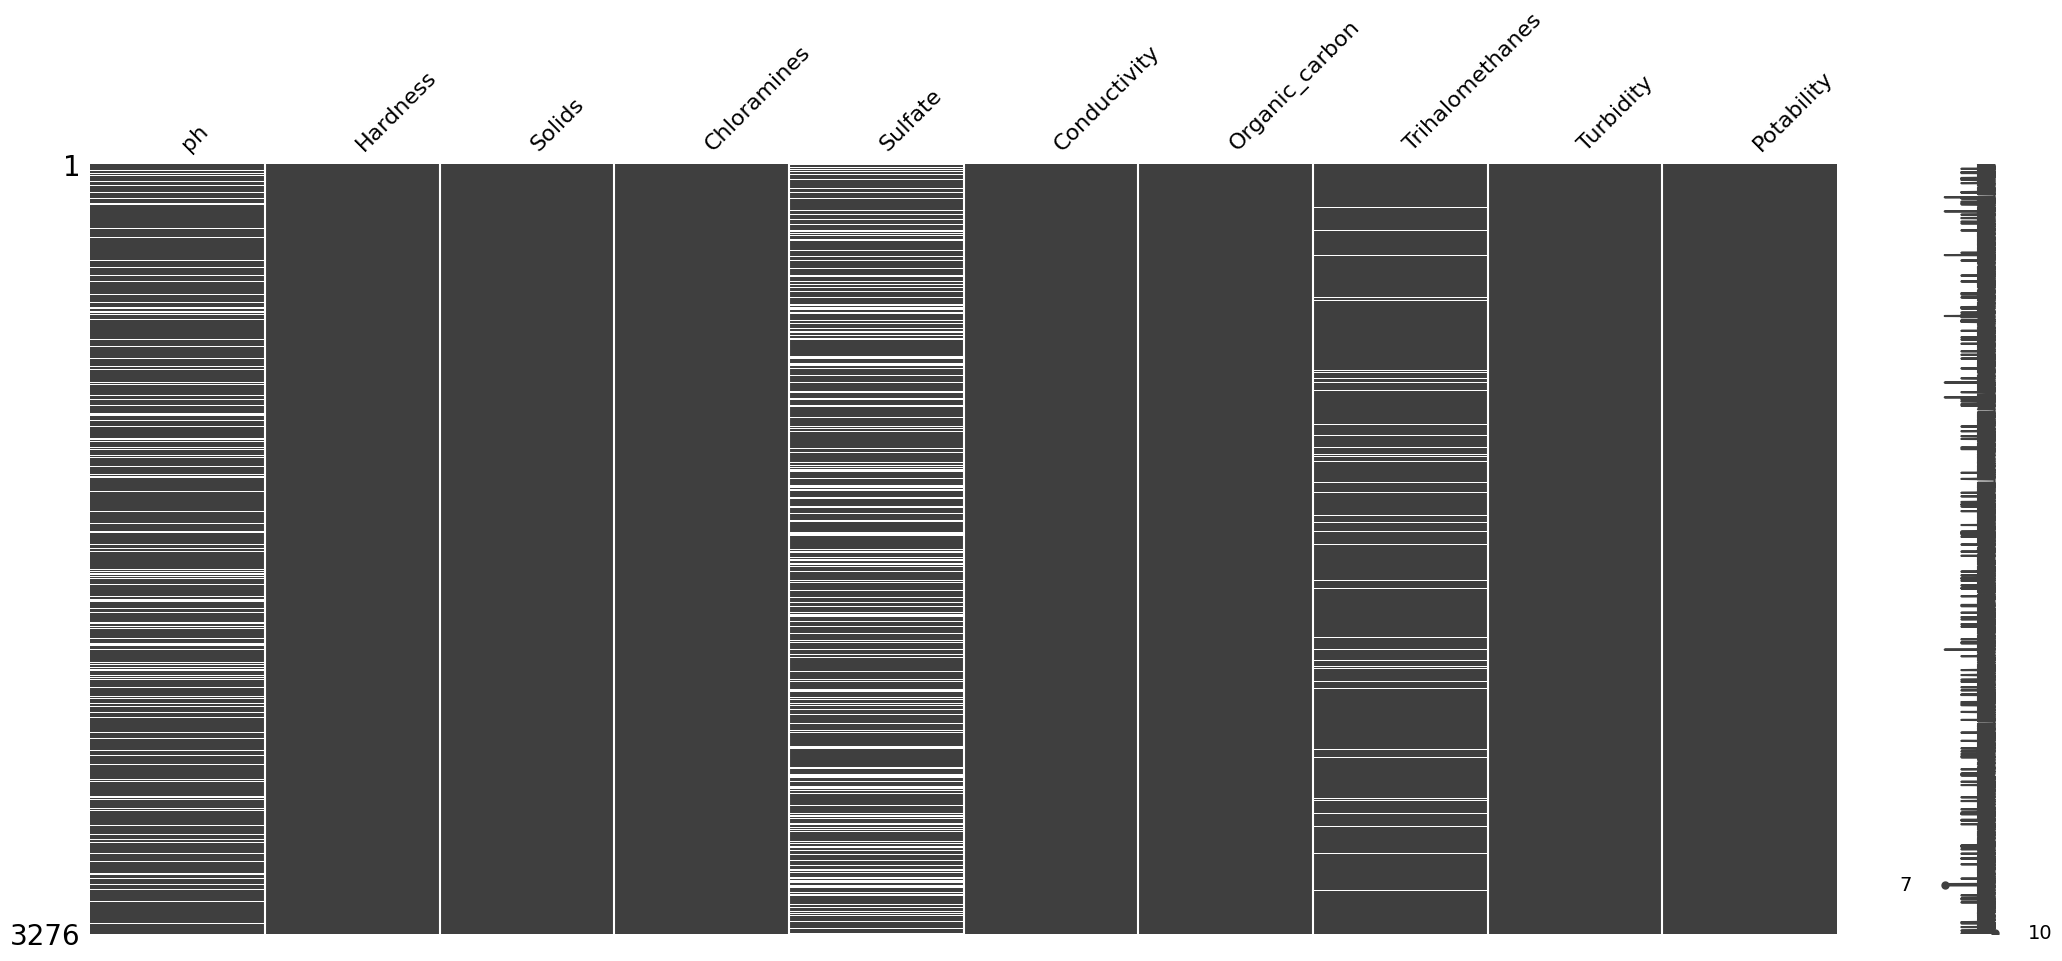

In [8]:
# VISUALIZING MISSING DATA

msno.matrix(df)

## Preprocessing and Training

In [9]:
# SEPARATE DATA X AND Y

x = df.drop(['Potability'], axis=1)
x.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [10]:
y = df['Potability']
y.head(5)

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [11]:
# SPLIT DATA INTO TRAIN SET AND TEST SET, THIS WILL BE THE HOLDOUT SET

trainX_full, testX, trainY_full, testY = train_test_split(x, y, test_size=0.2, random_state=42)

In [12]:
# STRATIFIED K FOLD SETUP
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [13]:
# USED FOR VISUALIZATION OF ACCURACY, PRECISION, RECALL, F1, SPECIFICITY
accuracy_summary = []
precision_summary = []
recall_summary = []
f1_summary = []
specificity_summary = []

impute_only_accuracy_summary = []
impute_only_precision_summary = []
impute_only_recall_summary = []
impute_only_f1_summary = []
impute_only_specificity_summary = []

## WITHOUT SCALING, AND SMOTING, ONLY IMPUTATION

### Random Forest Classification IMPUTE ONLY WITHOUT SCALING AND SMOTING

In [14]:
# no scaling or smoting pipeline
rfd_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier',RandomForestClassifier(random_state=42)),
]) 

In [15]:
# CROSS VALIDATION FOR PIPELINE WITH IMPUTE ONLY

rfd_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    rfd_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = rfd_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    rfd_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy NO SCALE AND SMOTE:", np.mean(rfd_impute_only_accuracies))


--- Fold 1 ---
Confusion Matrix:
 [[142  17]
 [ 71  32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.89      0.76       159
           1       0.65      0.31      0.42       103

    accuracy                           0.66       262
   macro avg       0.66      0.60      0.59       262
weighted avg       0.66      0.66      0.63       262

Accuracy: 0.6641221374045801

--- Fold 2 ---
Confusion Matrix:
 [[137  22]
 [ 70  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.86      0.75       159
           1       0.60      0.32      0.42       103

    accuracy                           0.65       262
   macro avg       0.63      0.59      0.58       262
weighted avg       0.64      0.65      0.62       262

Accuracy: 0.648854961832061

--- Fold 3 ---
Confusion Matrix:
 [[141  18]
 [ 64  39]]
Classification Report:
               precision    recall  f1-score

In [16]:
# FINAL MODEL EVALUATION SET

rfd_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = rfd_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "Random Forest Classifier",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "Random Forest Classifier",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"Random Forest Classifier",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"Random Forest Classifier",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"Random Forest Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Random Forest Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Random Forest Classifier:
Confusion Matrix:
 [[358  54]
 [160  84]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.34      0.44       244

    accuracy                           0.67       656
   macro avg       0.65      0.61      0.60       656
weighted avg       0.66      0.67      0.65       656

Test Accuracy: 0.6737804878048781



Feature Importance from Random Forest Classifier:
           Feature  Importance
4          Sulfate    0.127017
0               ph    0.124970
1         Hardness    0.119107
3      Chloramines    0.116421
2           Solids    0.114064
5     Conductivity    0.103062
6   Organic_carbon    0.102080
7  Trihalomethanes    0.097212
8        Turbidity    0.096068


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\4120816805.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


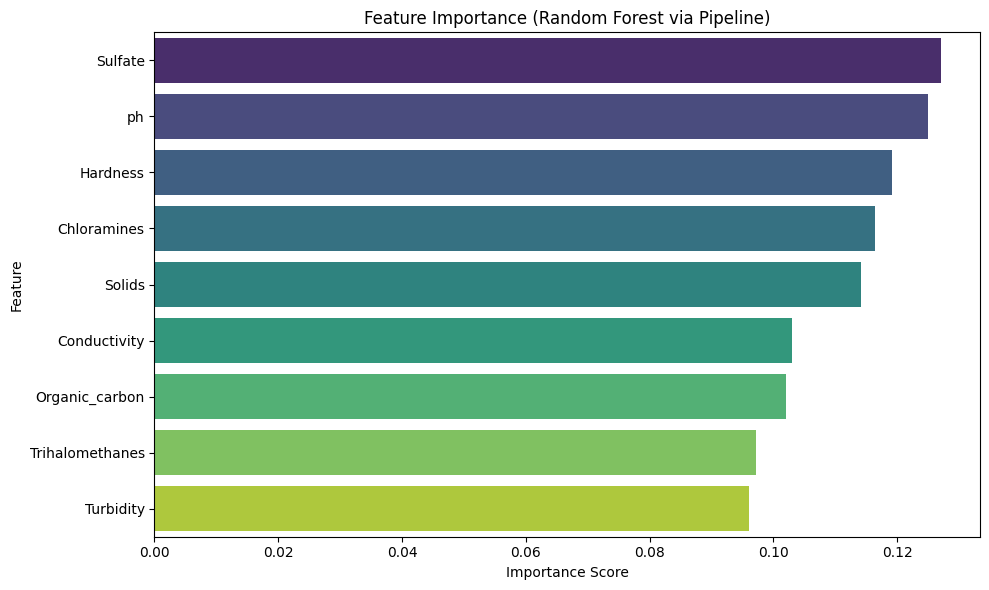

In [17]:
# FEATURE IMPORTANCE

# Get trained classifier from pipeline
rf_impute_only_classifier = rfd_impute_only_pipeline.named_steps['classifier']

# Get feature importances
importances = rf_impute_only_classifier.feature_importances_
feature_names = trainX_full.columns  # or x.columns

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Random Forest Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest via Pipeline)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Decision Tree IMPUTE ONLY, NO SCALING AND SMOTING

In [18]:
dt_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', DecisionTreeClassifier(random_state=42)),
])

In [19]:
# CROSS VALIDATION
dt_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    dt_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = dt_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    dt_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy NO SCALE AND SMOTE:", np.mean(dt_impute_only_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[88 71]
 [63 40]]
Classification Report:
               precision    recall  f1-score   support

           0       0.58      0.55      0.57       159
           1       0.36      0.39      0.37       103

    accuracy                           0.49       262
   macro avg       0.47      0.47      0.47       262
weighted avg       0.50      0.49      0.49       262

Accuracy: 0.48854961832061067

--- Fold 2 ---
Confusion Matrix:
 [[99 60]
 [48 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.62      0.65       159
           1       0.48      0.53      0.50       103

    accuracy                           0.59       262
   macro avg       0.58      0.58      0.58       262
weighted avg       0.60      0.59      0.59       262

Accuracy: 0.5877862595419847

--- Fold 3 ---
Confusion Matrix:
 [[111  48]
 [ 53  50]]
Classification Report:
               precision    recall  f1-score   sup

In [20]:
# FINAL MODEL EVALUATION SET

dt_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = dt_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "Decision Tree Classifier",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "Decision Tree Classifier",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"Decision Tree Classifier",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"Decision Tree Classifier",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"Decision Tree Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Decision Tree Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Decision Tree Classifier:
Confusion Matrix:
 [[259 153]
 [123 121]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.63      0.65       412
           1       0.44      0.50      0.47       244

    accuracy                           0.58       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.58      0.58       656

Test Accuracy: 0.5792682926829268



Feature Importance from Decision Tree Classifier:
           Feature  Importance
4          Sulfate    0.138630
0               ph    0.135133
3      Chloramines    0.129730
6   Organic_carbon    0.116293
1         Hardness    0.114537
2           Solids    0.114414
7  Trihalomethanes    0.096148
8        Turbidity    0.081498
5     Conductivity    0.073616


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\1189904625.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


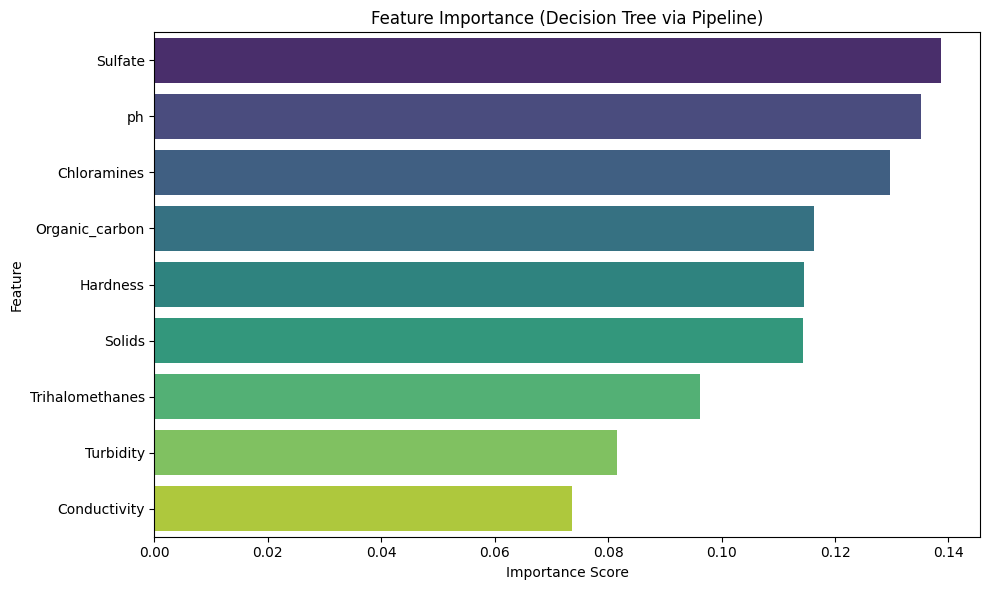

In [21]:
# FEATURE IMPORTANCE

# Get trained classifier from pipeline
dt_impute_only_classifier = dt_impute_only_pipeline.named_steps['classifier']

# Get feature importances
importances = dt_impute_only_classifier.feature_importances_
feature_names = trainX_full.columns  # or x.columns

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Decision Tree Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Decision Tree via Pipeline)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### KNN IMPUTE ONLY, NO SCALING AND SMOTING

In [22]:
knn_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', KNeighborsClassifier(n_neighbors=2),)
])

In [23]:
# CROSS VALIDATION
knn_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    knn_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = knn_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    knn_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(knn_impute_only_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[135  24]
 [ 84  19]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.85      0.71       159
           1       0.44      0.18      0.26       103

    accuracy                           0.59       262
   macro avg       0.53      0.52      0.49       262
weighted avg       0.55      0.59      0.54       262

Accuracy: 0.5877862595419847

--- Fold 2 ---
Confusion Matrix:
 [[136  23]
 [ 86  17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.86      0.71       159
           1       0.42      0.17      0.24       103

    accuracy                           0.58       262
   macro avg       0.52      0.51      0.48       262
weighted avg       0.54      0.58      0.53       262

Accuracy: 0.583969465648855

--- Fold 3 ---
Confusion Matrix:
 [[139  20]
 [ 87  16]]
Classification Report:
               precision    recall  f1-score

In [24]:
# FINAL MODEL EVALUATION SET

knn_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = knn_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "KNN",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "KNN",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"KNN",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"KNN",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"KNN",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using KNN:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using KNN:
Confusion Matrix:
 [[352  60]
 [211  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.85      0.72       412
           1       0.35      0.14      0.20       244

    accuracy                           0.59       656
   macro avg       0.49      0.49      0.46       656
weighted avg       0.52      0.59      0.53       656

Test Accuracy: 0.586890243902439


Feature importance does not work on KNN because it is a non-parametric, lazy-learning algorithm

### Logistic Regression IMPUTE ONLY, NO SCALING AND SMOTING

In [25]:
logRes_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', LogisticRegression(random_state=42)),
])

In [26]:
# CROSS VALIDATION
logRes_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    logRes_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = logRes_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    logRes_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(logRes_impute_only_accuracies))


--- Fold 1 ---
Confusion Matrix:
 [[159   0]
 [103   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       159
           1       0.00      0.00      0.00       103

    accuracy                           0.61       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.37      0.61      0.46       262

Accuracy: 0.6068702290076335

--- Fold 2 ---
Confusion Matrix:
 [[159   0]
 [103   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       159
           1       0.00      0.00      0.00       103

    accuracy                           0.61       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.37      0.61      0.46       262

Accuracy: 0.6068702290076335


c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p


--- Fold 3 ---
Confusion Matrix:
 [[159   0]
 [103   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       159
           1       0.00      0.00      0.00       103

    accuracy                           0.61       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.37      0.61      0.46       262

Accuracy: 0.6068702290076335

--- Fold 4 ---
Confusion Matrix:
 [[159   0]
 [103   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      1.00      0.76       159
           1       0.00      0.00      0.00       103

    accuracy                           0.61       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.37      0.61      0.46       262

Accuracy: 0.6068702290076335

--- Fold 5 ---
Confusion Matrix:
 [[157   2]
 [100   3]]
Classification Report:
               precision    recall  f1-scor

c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py


--- Fold 7 ---
Confusion Matrix:
 [[158   0]
 [104   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       158
           1       0.00      0.00      0.00       104

    accuracy                           0.60       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.36      0.60      0.45       262

Accuracy: 0.6030534351145038

--- Fold 8 ---
Confusion Matrix:
 [[158   0]
 [104   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      1.00      0.75       158
           1       0.00      0.00      0.00       104

    accuracy                           0.60       262
   macro avg       0.30      0.50      0.38       262
weighted avg       0.36      0.60      0.45       262

Accuracy: 0.6030534351145038

--- Fold 9 ---
Confusion Matrix:
 [[158   0]
 [104   0]]
Classification Report:
               precision    recall  f1-scor

c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [27]:
# FINAL MODEL EVALUATION SET

logRes_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = logRes_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "Logistic Regression",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "Logistic Regression",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"Logistic Regression",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"Logistic Regression",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"Logistic Regression",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Logistic Regression:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Logistic Regression:
Confusion Matrix:
 [[412   0]
 [244   0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77       412
           1       0.00      0.00      0.00       244

    accuracy                           0.63       656
   macro avg       0.31      0.50      0.39       656
weighted avg       0.39      0.63      0.48       656

Test Accuracy: 0.6280487804878049


c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mosqu\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.p

C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\1720359640.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')



Feature Importance from Logistic Regression:
           Feature  Importance
6   Organic_carbon   -0.017962
3      Chloramines    0.004631
0               ph   -0.002777
7  Trihalomethanes    0.001608
8        Turbidity   -0.001182
1         Hardness   -0.001008
4          Sulfate   -0.000741
5     Conductivity   -0.000065
2           Solids    0.000008


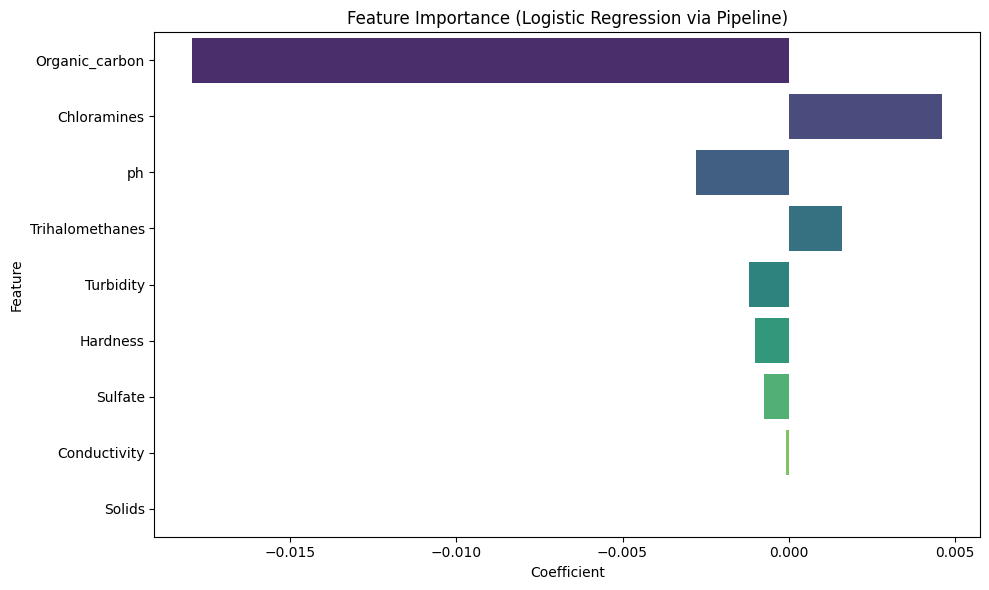

In [28]:
# FEATURE IMPORTANCE FOR LOGISTIC REGRESSION

# Get trained classifier from pipeline
logRes_impute_only_classifier = logRes_impute_only_pipeline.named_steps['classifier']

# Get feature names
feature_names = trainX_full.columns  # or x.columns

# Get absolute feature importances (coefficients)
importances = logRes_impute_only_classifier.coef_[0]
abs_importances = np.abs(importances)

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Abs_Importance': abs_importances
}).sort_values(by='Abs_Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Logistic Regression:")
print(feat_importance_df[['Feature', 'Importance']])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Logistic Regression via Pipeline)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### SVM ONLY IMPUTATION, NO SCALING AND SMOTING - OMIT

In [29]:
# svm_impute_only_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='median')),
#     ('classifier', SVC(kernel='linear')),
# ])

In [30]:
# # CROSS VALIDATION
# svm_impute_only_accuracies = []

# for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
#     trainX = trainX_full.iloc[train_idx]
#     x_val = trainX_full.iloc[val_idx]
#     trainY = trainY_full.iloc[train_idx]
#     y_val = trainY_full.iloc[val_idx]

#     # fit pipelines on training fold
#     svm_impute_only_pipeline.fit(trainX, trainY)

#     # predict on validation fold
#     predictY = svm_impute_only_pipeline.predict(x_val)

#     # report metrics
#     print(f"\n--- Fold {fold} ---")
#     print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
#     print("Classification Report:\n", classification_report(y_val, predictY))
#     acc = accuracy_score(y_val, predictY)
#     print("Accuracy:", acc)
#     svm_impute_only_accuracies.append(acc)

# # OVERALL CROSS VALIDATION SCORE
# print("\nAverage Cross Validation Accuracy:", np.mean(svm_impute_only_accuracies))


In [31]:
# # FINAL MODEL EVALUATION SET

# svm_impute_only_pipeline.fit(trainX_full, trainY_full)
# y_test_predict = svm_impute_only_pipeline.predict(testX)

# # classification report
# class_report = classification_report(testY, y_test_predict)

# # accuracy score
# ac = accuracy_score(testY, y_test_predict)

# # confusion matrix
# cm = confusion_matrix(testY, y_test_predict)

# if cm.shape == (2,2):
#     tp, fn, fp, tn = cm.ravel()
# else:
#     tp = fn = fp = tn = 0

# # metrics
# precision = tp / (tp + fp) if (tp + fp) != 0 else 0
# recall = tp / (tp + fn) if (tp + fn) != 0 else 0
# specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
# f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# # append this for visualization
# impute_only_accuracy_summary.append({
#     "Model": "SVM",
#     "Test Accuracy": ac
# })

# impute_only_precision_summary.append({
#     "Model": "SVM",
#     "Precision": precision
# })

# impute_only_recall_summary.append({
#     "Model":"SVM",
#     "Recall": recall
# })

# impute_only_specificity_summary.append({
#     "Model":"SVM",
#     "Specificity": specificity
# })

# impute_only_f1_summary.append({
#     "Model":"SVM",
#     "F1 Score": f1
# })

# print('\nFinal Evaluation on Test Set using SVM:')
# print('Confusion Matrix:\n', cm)
# print('Classification Report:\n', class_report)
# print("Test Accuracy:", ac)

In [32]:
# # FEATURE IMPORTANCE FOR SVM WITH LINEAR KERNEL

# # Get trained classifier from pipeline
# svm_impute_only_classifier = svm_impute_only_pipeline.named_steps['classifier']

# # Check if coef_ exists (only available for linear kernel)
# if hasattr(svm_impute_only_classifier, 'coef_'):
#     # Get absolute feature importances
#     importances = np.abs(svm_impute_only_classifier.coef_[0])
    
#     feature_names = trainX_full.columns  # or x.columns

#     # Create DataFrame for visualization
#     feat_importance_df = pd.DataFrame({
#         'Feature': feature_names,
#         'Importance': importances
#     }).sort_values(by='Importance', ascending=False)

#     # Print and visualize
#     print("\nFeature Importance from Linear SVM:")
#     print(feat_importance_df)

#     # Plot
#     plt.figure(figsize=(10, 6))
#     sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
#     plt.title('Feature Importance (Linear SVM via Pipeline)')
#     plt.xlabel('Absolute Coefficient Value')
#     plt.ylabel('Feature')
#     plt.tight_layout()
#     plt.show()
# else:
#     print("The SVM classifier does not use a linear kernel. Feature importances (coef_) are not available.")


### Naive Bayes ONLY IMPUTATION, NO SCALING AND SMOTING

In [33]:
nb_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', GaussianNB())
])

In [34]:
# CROSS VALIDATION
nb_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    nb_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = nb_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    nb_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(nb_impute_only_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[142  17]
 [ 75  28]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.76       159
           1       0.62      0.27      0.38       103

    accuracy                           0.65       262
   macro avg       0.64      0.58      0.57       262
weighted avg       0.64      0.65      0.61       262

Accuracy: 0.648854961832061

--- Fold 2 ---
Confusion Matrix:
 [[139  20]
 [ 72  31]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.87      0.75       159
           1       0.61      0.30      0.40       103

    accuracy                           0.65       262
   macro avg       0.63      0.59      0.58       262
weighted avg       0.64      0.65      0.61       262

Accuracy: 0.648854961832061

--- Fold 3 ---
Confusion Matrix:
 [[137  22]
 [ 76  27]]
Classification Report:
               precision    recall  f1-score 

In [35]:
# FINAL MODEL EVALUATION SET

nb_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = nb_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "Naive Bayes",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "Naive Bayes",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"Naive Bayes",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"Naive Bayes",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"Naive Bayes",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Naive Bayes:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Naive Bayes:
Confusion Matrix:
 [[360  52]
 [192  52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.87      0.75       412
           1       0.50      0.21      0.30       244

    accuracy                           0.63       656
   macro avg       0.58      0.54      0.52       656
weighted avg       0.60      0.63      0.58       656

Test Accuracy: 0.6280487804878049



Feature Importance from Gaussian Naive Bayes:
           Feature  Importance
2           Solids  696.278234
4          Sulfate    1.371096
1         Hardness    1.132043
5     Conductivity    0.425597
7  Trihalomethanes    0.417446
6   Organic_carbon    0.182943
3      Chloramines    0.049754
0               ph    0.035402
8        Turbidity    0.006727


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\4016426109.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='magma')


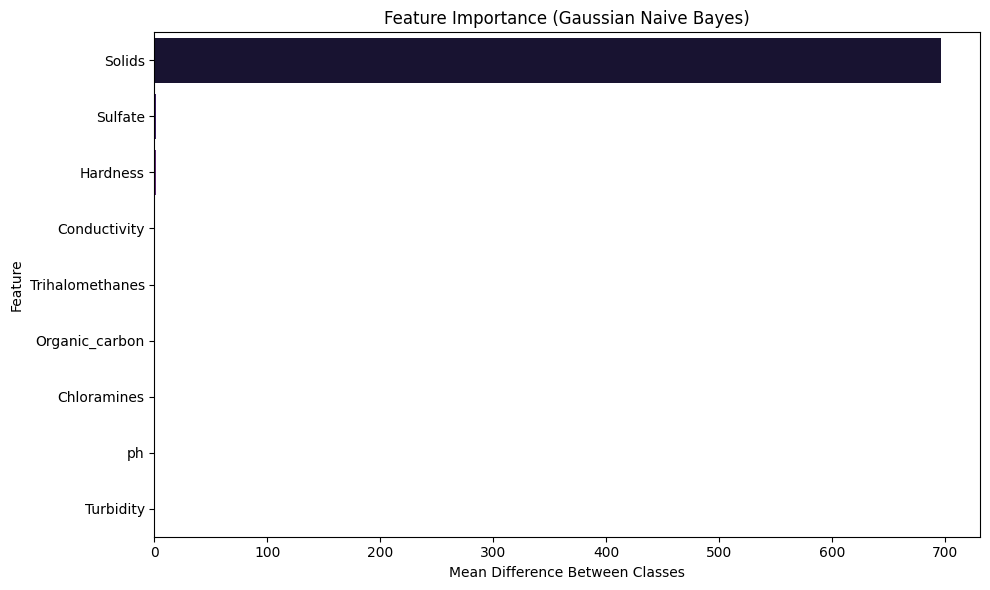

In [36]:
# Get trained GaussianNB classifier from pipeline
nb_impute_only_classifier = nb_impute_only_pipeline.named_steps['classifier']

# Class-conditional means (theta_) shape: [n_classes, n_features]
means = nb_impute_only_classifier.theta_

# Feature importance = abs difference in means between classes
importance = np.abs(means[0] - means[1])

# Create DataFrame
feature_names = trainX_full.columns
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print result
print("\nFeature Importance from Gaussian Naive Bayes:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='magma')
plt.title('Feature Importance (Gaussian Naive Bayes)')
plt.xlabel('Mean Difference Between Classes')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Gradient Boosting IMPUTE ONLY, NO SCALING AND SMOTING

In [37]:
gb_impute_only_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

In [38]:
# CROSS VALIDATION
gb_impute_only_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    gb_impute_only_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = gb_impute_only_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    gb_impute_only_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(gb_impute_only_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[148  11]
 [ 77  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.93      0.77       159
           1       0.70      0.25      0.37       103

    accuracy                           0.66       262
   macro avg       0.68      0.59      0.57       262
weighted avg       0.68      0.66      0.61       262

Accuracy: 0.6641221374045801

--- Fold 2 ---
Confusion Matrix:
 [[141  18]
 [ 77  26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.89      0.75       159
           1       0.59      0.25      0.35       103

    accuracy                           0.64       262
   macro avg       0.62      0.57      0.55       262
weighted avg       0.62      0.64      0.59       262

Accuracy: 0.6374045801526718

--- Fold 3 ---
Confusion Matrix:
 [[144  15]
 [ 71  32]]
Classification Report:
               precision    recall  f1-scor

In [39]:
# FINAL MODEL EVALUATION SET

gb_impute_only_pipeline.fit(trainX_full, trainY_full)
y_test_predict = gb_impute_only_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
impute_only_accuracy_summary.append({
    "Model": "Gradient Boosting",
    "Test Accuracy": ac
})

impute_only_precision_summary.append({
    "Model": "Gradient Boosting",
    "Precision": precision
})

impute_only_recall_summary.append({
    "Model":"Gradient Boosting",
    "Recall": recall
})

impute_only_specificity_summary.append({
    "Model":"Gradient Boosting",
    "Specificity": specificity
})

impute_only_f1_summary.append({
    "Model":"Gradient Boosting",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Gradient Boosting:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Gradient Boosting:
Confusion Matrix:
 [[370  42]
 [182  62]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.90      0.77       412
           1       0.60      0.25      0.36       244

    accuracy                           0.66       656
   macro avg       0.63      0.58      0.56       656
weighted avg       0.64      0.66      0.61       656

Test Accuracy: 0.6585365853658537



Feature Importance from Gradient Boosting Classifier:
           Feature  Importance
0               ph    0.241172
4          Sulfate    0.190276
1         Hardness    0.154517
3      Chloramines    0.135713
2           Solids    0.107527
5     Conductivity    0.055184
7  Trihalomethanes    0.052929
6   Organic_carbon    0.044156
8        Turbidity    0.018527


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\41583287.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='rocket')


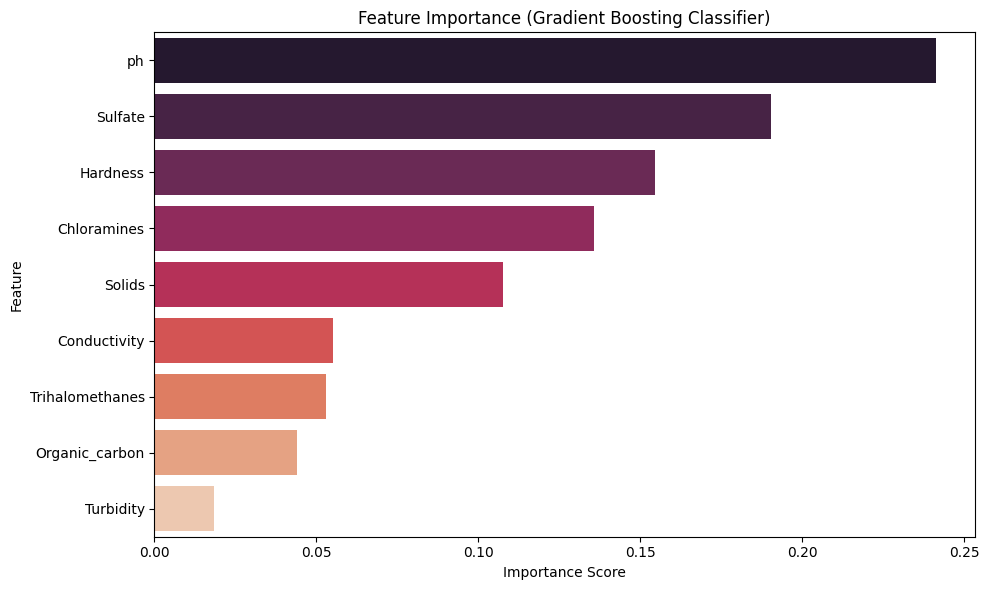

In [40]:
# Get trained Gradient Boosting classifier from pipeline
gb_impute_only_classifier = gb_impute_only_pipeline.named_steps['classifier']

# Get feature importances
importance = gb_impute_only_classifier.feature_importances_

# Create DataFrame
feature_names = trainX_full.columns
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print result
print("\nFeature Importance from Gradient Boosting Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='rocket')
plt.title('Feature Importance (Gradient Boosting Classifier)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## WITH IMPUTATION, SCALING, AND SMOTING

### Random Forest WITH SCALING, SMOTING, AND IMPUTATION

In [41]:
# PIPELINE FOR RANDOM FOREST

rfd_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', RandomForestClassifier(random_state=42)),
])

In [42]:
# CROSS VALIDATION FOR rfd_pipeline
rfd_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    rfd_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = rfd_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    rfd_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(rfd_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[122  37]
 [ 57  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       159
           1       0.55      0.45      0.49       103

    accuracy                           0.64       262
   macro avg       0.62      0.61      0.61       262
weighted avg       0.63      0.64      0.63       262

Accuracy: 0.6412213740458015

--- Fold 2 ---
Confusion Matrix:
 [[119  40]
 [ 57  46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.75      0.71       159
           1       0.53      0.45      0.49       103

    accuracy                           0.63       262
   macro avg       0.61      0.60      0.60       262
weighted avg       0.62      0.63      0.62       262

Accuracy: 0.6297709923664122

--- Fold 3 ---
Confusion Matrix:
 [[125  34]
 [ 51  52]]
Classification Report:
               precision    recall  f1-scor

In [43]:
# FINAL MODEL EVALUATION SET

rfd_pipeline.fit(trainX_full, trainY_full)
y_test_predict = rfd_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Random Forest Classifier",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Random Forest Classifier",
    "Precision": precision
})

recall_summary.append({
    "Model":"Random Forest Classifier",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Random Forest Classifier",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Random Forest Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Random Forest Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Random Forest Classifier:
Confusion Matrix:
 [[303 109]
 [126 118]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.74      0.72       412
           1       0.52      0.48      0.50       244

    accuracy                           0.64       656
   macro avg       0.61      0.61      0.61       656
weighted avg       0.64      0.64      0.64       656

Test Accuracy: 0.6417682926829268



Feature Importance from Random Forest Classifier:
           Feature  Importance
0               ph    0.132808
4          Sulfate    0.118953
3      Chloramines    0.118519
2           Solids    0.117574
1         Hardness    0.117498
6   Organic_carbon    0.105599
8        Turbidity    0.096893
5     Conductivity    0.096151
7  Trihalomethanes    0.096006


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\3153694707.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


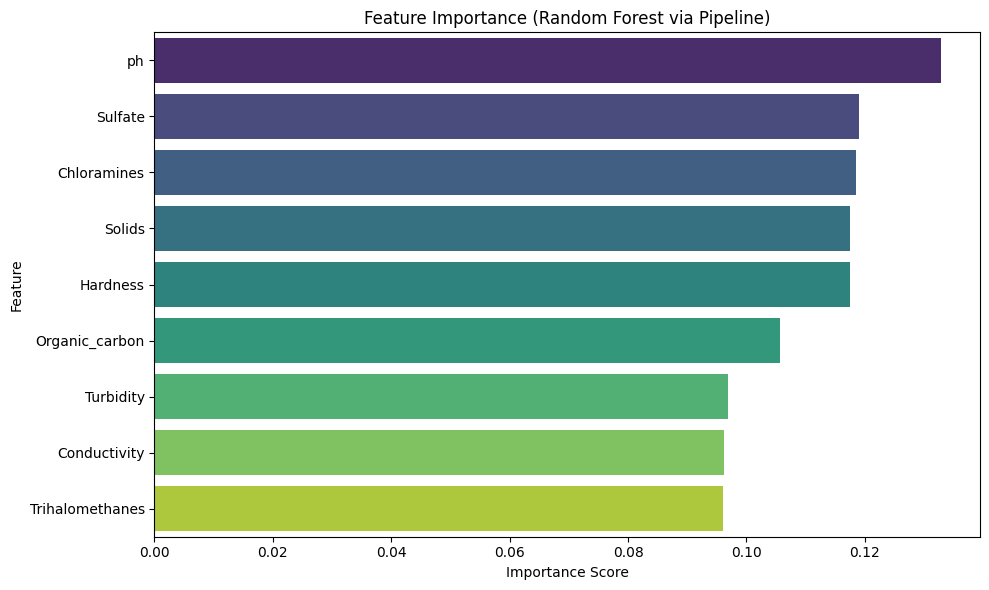

In [44]:
# FEATURE IMPORTANCE

# Get trained classifier from pipeline
rf_classifier = rfd_pipeline.named_steps['classifier']

# Get feature importances
importances = rf_classifier.feature_importances_
feature_names = trainX_full.columns  # or x.columns

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Random Forest Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Random Forest via Pipeline)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Decision Tree Classification WITH SCALING, SMOTING, AND IMPUTATION

In [45]:
# PIPELINE FOR DECISION TREE

dt_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', DecisionTreeClassifier(random_state=42)),
])

In [46]:
# CROSS VALIDATION
dt_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    dt_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = dt_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    dt_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(dt_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[88 71]
 [42 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.55      0.61       159
           1       0.46      0.59      0.52       103

    accuracy                           0.57       262
   macro avg       0.57      0.57      0.56       262
weighted avg       0.59      0.57      0.57       262

Accuracy: 0.5687022900763359

--- Fold 2 ---
Confusion Matrix:
 [[98 61]
 [51 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.62      0.64       159
           1       0.46      0.50      0.48       103

    accuracy                           0.57       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.58      0.57      0.58       262

Accuracy: 0.5725190839694656

--- Fold 3 ---
Confusion Matrix:
 [[91 68]
 [50 53]]
Classification Report:
               precision    recall  f1-score   support


In [47]:
# FINAL MODEL EVALUATION SET

dt_pipeline.fit(trainX_full, trainY_full)
y_test_predict = dt_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Decision Tree Classifier",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Decision Tree Classifier",
    "Precision": precision
})

recall_summary.append({
    "Model":"Decision Tree Classifier",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Decision Tree Classifier",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Decision Tree Classifier",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Decision Tree Classifier:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Decision Tree Classifier:
Confusion Matrix:
 [[256 156]
 [117 127]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.62      0.65       412
           1       0.45      0.52      0.48       244

    accuracy                           0.58       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.60      0.58      0.59       656

Test Accuracy: 0.5838414634146342



Feature Importance from Decision Tree Classifier:
           Feature  Importance
0               ph    0.144174
1         Hardness    0.141550
3      Chloramines    0.126891
2           Solids    0.120347
7  Trihalomethanes    0.101464
6   Organic_carbon    0.100644
4          Sulfate    0.099701
5     Conductivity    0.085641
8        Turbidity    0.079588


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\3813582065.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


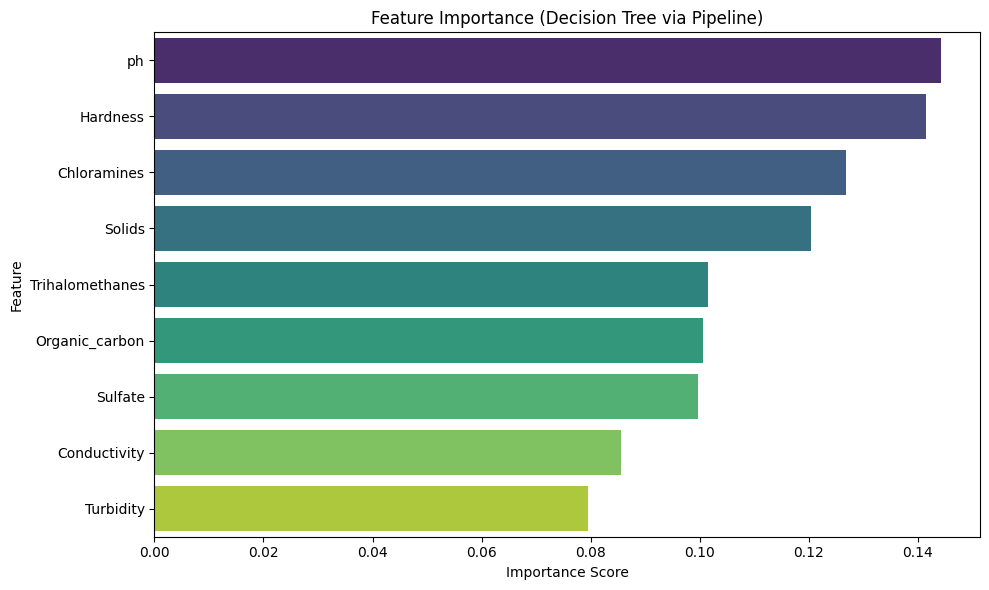

In [48]:
# FEATURE IMPORTANCE

# Get trained classifier from pipeline
dt_classifier = dt_pipeline.named_steps['classifier']

# Get feature importances
importances = dt_classifier.feature_importances_
feature_names = trainX_full.columns  # or x.columns

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Decision Tree Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Decision Tree via Pipeline)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### KNN WITH SCALING, SMOTING, AND IMPUTATION

In [49]:
# PIPELINE FOR KNN

knn_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', KNeighborsClassifier(n_neighbors=2)),
])

In [50]:
# CROSS VALIDATION
knn_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    knn_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = knn_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    knn_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(knn_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[125  34]
 [ 70  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.79      0.71       159
           1       0.49      0.32      0.39       103

    accuracy                           0.60       262
   macro avg       0.57      0.55      0.55       262
weighted avg       0.58      0.60      0.58       262

Accuracy: 0.6030534351145038

--- Fold 2 ---
Confusion Matrix:
 [[122  37]
 [ 70  33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.77      0.70       159
           1       0.47      0.32      0.38       103

    accuracy                           0.59       262
   macro avg       0.55      0.54      0.54       262
weighted avg       0.57      0.59      0.57       262

Accuracy: 0.5916030534351145

--- Fold 3 ---
Confusion Matrix:
 [[136  23]
 [ 75  28]]
Classification Report:
               precision    recall  f1-scor

In [51]:
# FINAL MODEL EVALUATION SET

knn_pipeline.fit(trainX_full, trainY_full)
y_test_predict = knn_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "KNN",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "KNN",
    "Precision": precision
})

recall_summary.append({
    "Model":"KNN",
    "Recall": recall
})

specificity_summary.append({
    "Model":"KNN",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"KNN",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using KNN:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using KNN:
Confusion Matrix:
 [[336  76]
 [161  83]]
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.82      0.74       412
           1       0.52      0.34      0.41       244

    accuracy                           0.64       656
   macro avg       0.60      0.58      0.58       656
weighted avg       0.62      0.64      0.62       656

Test Accuracy: 0.6387195121951219


Feature importance does not work on KNN because it is a non-parametric, lazy-learning algorithm

### Logistic Regression WITH SCALING, SMOTING, AND IMPUTATION

In [52]:
# PIPELINE FOR LOGISTIC REGRESSION

logRes_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', LogisticRegression(random_state=42)),
])

In [53]:
# CROSS VALIDATION
logRes_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    logRes_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = logRes_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    logRes_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(logRes_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[80 79]
 [50 53]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.50      0.55       159
           1       0.40      0.51      0.45       103

    accuracy                           0.51       262
   macro avg       0.51      0.51      0.50       262
weighted avg       0.53      0.51      0.51       262

Accuracy: 0.5076335877862596

--- Fold 2 ---
Confusion Matrix:
 [[84 75]
 [56 47]]
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.53      0.56       159
           1       0.39      0.46      0.42       103

    accuracy                           0.50       262
   macro avg       0.49      0.49      0.49       262
weighted avg       0.52      0.50      0.51       262

Accuracy: 0.5

--- Fold 3 ---
Confusion Matrix:
 [[76 83]
 [55 48]]
Classification Report:
               precision    recall  f1-score   support

           0  

In [54]:
# FINAL MODEL EVALUATION SET

logRes_pipeline.fit(trainX_full, trainY_full)
y_test_predict = logRes_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Logistic Regression",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Logistic Regression",
    "Precision": precision
})

recall_summary.append({
    "Model":"Logistic Regression",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Logistic Regression",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Logistic Regression",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Logistic Regression:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Logistic Regression:
Confusion Matrix:
 [[211 201]
 [129 115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.51      0.56       412
           1       0.36      0.47      0.41       244

    accuracy                           0.50       656
   macro avg       0.49      0.49      0.49       656
weighted avg       0.53      0.50      0.51       656

Test Accuracy: 0.4969512195121951



Feature Importance from Logistic Regression:
           Feature  Importance
2           Solids    0.063892
6   Organic_carbon   -0.052546
1         Hardness   -0.034046
8        Turbidity   -0.023080
7  Trihalomethanes    0.023042
3      Chloramines    0.022054
0               ph   -0.018194
5     Conductivity    0.008122
4          Sulfate   -0.005116


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\408570406.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


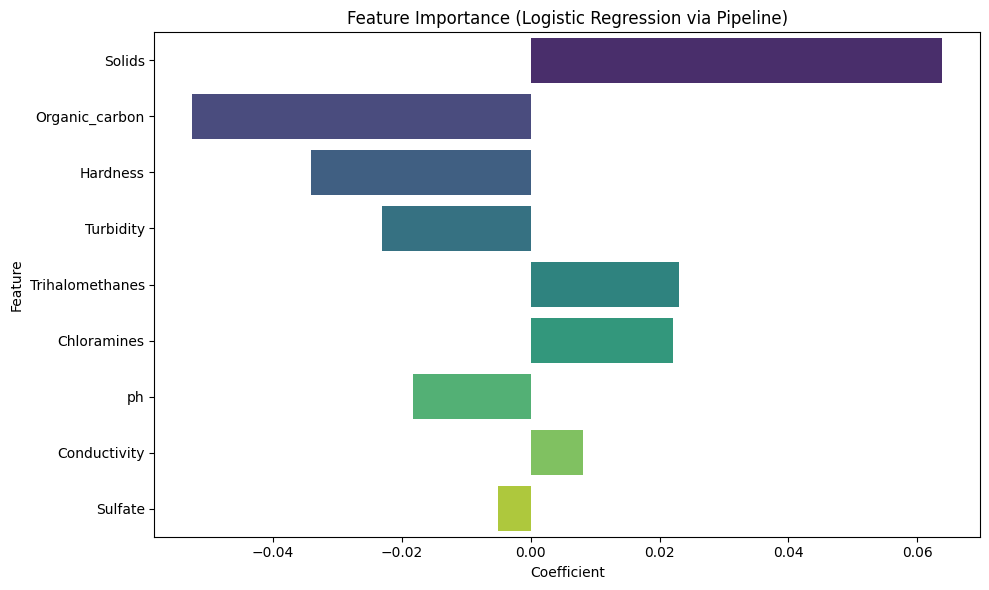

In [55]:
# FEATURE IMPORTANCE FOR LOGISTIC REGRESSION

# Get trained classifier from pipeline
logRes_classifier = logRes_pipeline.named_steps['classifier']

# Get feature names
feature_names = trainX_full.columns  # or x.columns

# Get absolute feature importances (coefficients)
importances = logRes_classifier.coef_[0]
abs_importances = np.abs(importances)

# Create DataFrame for visualization
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances,
    'Abs_Importance': abs_importances
}).sort_values(by='Abs_Importance', ascending=False)

# Print and visualize
print("\nFeature Importance from Logistic Regression:")
print(feat_importance_df[['Feature', 'Importance']])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
plt.title('Feature Importance (Logistic Regression via Pipeline)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### SVM WITH SCALING, SMOTING, AND IMPUTATION

In [56]:
# PIPELINE FOR SVM

svm_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(kernel='linear')),
])

In [57]:
# CROSS VALIDATION
svm_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    svm_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = svm_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    svm_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(svm_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[85 74]
 [54 49]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.53      0.57       159
           1       0.40      0.48      0.43       103

    accuracy                           0.51       262
   macro avg       0.50      0.51      0.50       262
weighted avg       0.53      0.51      0.52       262

Accuracy: 0.5114503816793893

--- Fold 2 ---
Confusion Matrix:
 [[89 70]
 [57 46]]
Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.56      0.58       159
           1       0.40      0.45      0.42       103

    accuracy                           0.52       262
   macro avg       0.50      0.50      0.50       262
weighted avg       0.53      0.52      0.52       262

Accuracy: 0.5152671755725191

--- Fold 3 ---
Confusion Matrix:
 [[86 73]
 [62 41]]
Classification Report:
               precision    recall  f1-score   support


In [58]:
# FINAL MODEL EVALUATION SET

svm_pipeline.fit(trainX_full, trainY_full)
y_test_predict = svm_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "SVM",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "SVM",
    "Precision": precision
})

recall_summary.append({
    "Model":"SVM",
    "Recall": recall
})

specificity_summary.append({
    "Model":"SVM",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"SVM",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using SVM:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using SVM:
Confusion Matrix:
 [[229 183]
 [136 108]]
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.56      0.59       412
           1       0.37      0.44      0.40       244

    accuracy                           0.51       656
   macro avg       0.50      0.50      0.50       656
weighted avg       0.53      0.51      0.52       656

Test Accuracy: 0.5137195121951219



Feature Importance from Linear SVM:
           Feature  Importance
2           Solids    0.299067
6   Organic_carbon    0.280024
1         Hardness    0.168203
3      Chloramines    0.136909
7  Trihalomethanes    0.113379
0               ph    0.084200
8        Turbidity    0.077849
5     Conductivity    0.033134
4          Sulfate    0.006065


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\3884894841.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')


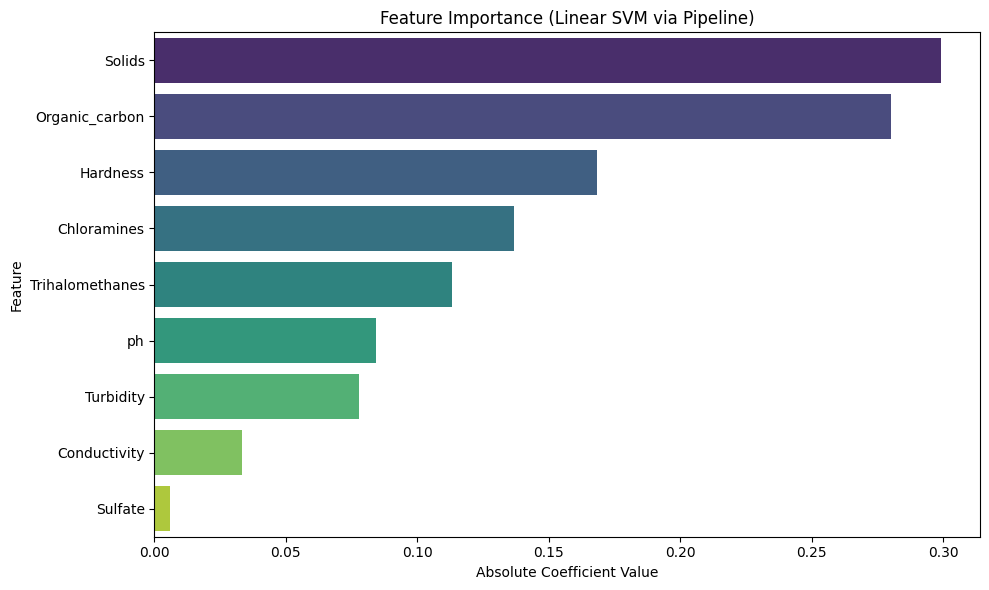

In [59]:
# FEATURE IMPORTANCE FOR SVM WITH LINEAR KERNEL

# Get trained classifier from pipeline
svm_classifier = svm_pipeline.named_steps['classifier']

# Check if coef_ exists (only available for linear kernel)
if hasattr(svm_classifier, 'coef_'):
    # Get absolute feature importances
    importances = np.abs(svm_classifier.coef_[0])
    
    feature_names = trainX_full.columns  # or x.columns

    # Create DataFrame for visualization
    feat_importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values(by='Importance', ascending=False)

    # Print and visualize
    print("\nFeature Importance from Linear SVM:")
    print(feat_importance_df)

    # Plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='viridis')
    plt.title('Feature Importance (Linear SVM via Pipeline)')
    plt.xlabel('Absolute Coefficient Value')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()
else:
    print("The SVM classifier does not use a linear kernel. Feature importances (coef_) are not available.")


### Naive Bayes WITH SCALING, SMOTING, AND IMPUTATION

In [60]:
# PIPELINE FOR Naive Bayes

nb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GaussianNB()),
])

In [61]:
# CROSS VALIDATION
nb_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    nb_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = nb_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    nb_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(nb_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[101  58]
 [ 53  50]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.64      0.65       159
           1       0.46      0.49      0.47       103

    accuracy                           0.58       262
   macro avg       0.56      0.56      0.56       262
weighted avg       0.58      0.58      0.58       262

Accuracy: 0.5763358778625954

--- Fold 2 ---
Confusion Matrix:
 [[95 64]
 [42 61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.60      0.64       159
           1       0.49      0.59      0.54       103

    accuracy                           0.60       262
   macro avg       0.59      0.59      0.59       262
weighted avg       0.61      0.60      0.60       262

Accuracy: 0.5954198473282443

--- Fold 3 ---
Confusion Matrix:
 [[101  58]
 [ 49  54]]
Classification Report:
               precision    recall  f1-score   

In [62]:
# FINAL MODEL EVALUATION SET

nb_pipeline.fit(trainX_full, trainY_full)
y_test_predict = nb_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Naive Bayes",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Naive Bayes",
    "Precision": precision
})

recall_summary.append({
    "Model":"Naive Bayes",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Naive Bayes",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Naive Bayes",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Naive Bayes:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Naive Bayes:
Confusion Matrix:
 [[274 138]
 [133 111]]
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.67      0.67       412
           1       0.45      0.45      0.45       244

    accuracy                           0.59       656
   macro avg       0.56      0.56      0.56       656
weighted avg       0.59      0.59      0.59       656

Test Accuracy: 0.586890243902439



Feature Importance from Gaussian Naive Bayes:
           Feature  Importance
2           Solids    0.064940
6   Organic_carbon    0.049900
1         Hardness    0.040092
7  Trihalomethanes    0.023559
0               ph    0.021370
3      Chloramines    0.020230
8        Turbidity    0.018646
4          Sulfate    0.014806
5     Conductivity    0.008227


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\1779536447.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='magma')


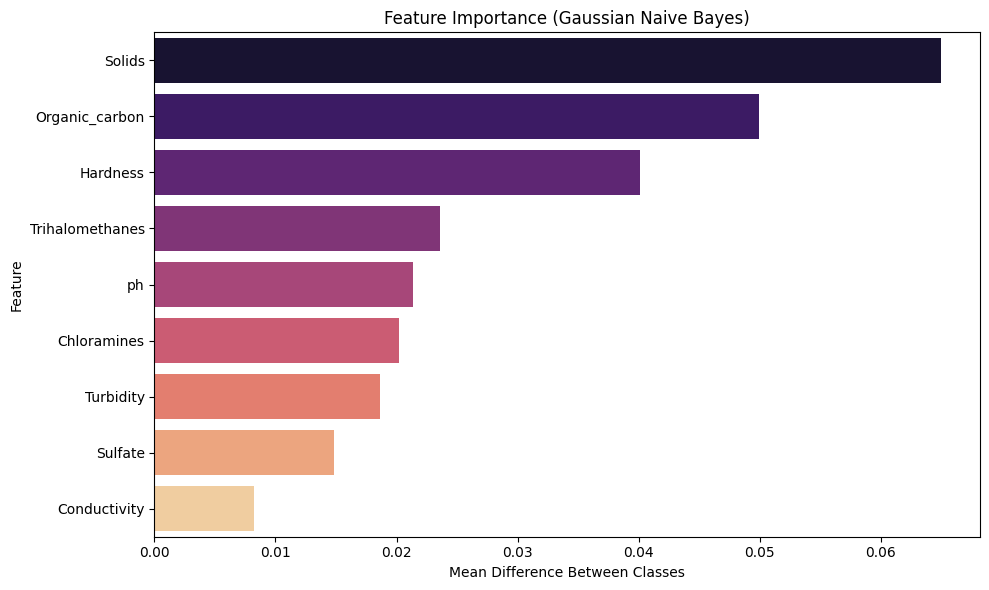

In [63]:
# Get trained GaussianNB classifier from pipeline
nb_classifier = nb_pipeline.named_steps['classifier']

# Class-conditional means (theta_) shape: [n_classes, n_features]
means = nb_classifier.theta_

# Feature importance = abs difference in means between classes
importance = np.abs(means[0] - means[1])

# Create DataFrame
feature_names = trainX_full.columns
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print result
print("\nFeature Importance from Gaussian Naive Bayes:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='magma')
plt.title('Feature Importance (Gaussian Naive Bayes)')
plt.xlabel('Mean Difference Between Classes')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


### Gradient Boosting

In [64]:
# PIPELINE FOR Gradient Boosting

gb_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('smote', SMOTE(random_state=42)),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
])

In [65]:
# CROSS VALIDATION
gb_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(trainX_full, trainY_full), 1):
    trainX = trainX_full.iloc[train_idx]
    x_val = trainX_full.iloc[val_idx]
    trainY = trainY_full.iloc[train_idx]
    y_val = trainY_full.iloc[val_idx]

    # fit pipelines on training fold
    gb_pipeline.fit(trainX, trainY)

    # predict on validation fold
    predictY = gb_pipeline.predict(x_val)

    # report metrics
    print(f"\n--- Fold {fold} ---")
    print("Confusion Matrix:\n", confusion_matrix(y_val, predictY))
    print("Classification Report:\n", classification_report(y_val, predictY))
    acc = accuracy_score(y_val, predictY)
    print("Accuracy:", acc)
    gb_accuracies.append(acc)

# OVERALL CROSS VALIDATION SCORE
print("\nAverage Cross Validation Accuracy:", np.mean(gb_accuracies))



--- Fold 1 ---
Confusion Matrix:
 [[105  54]
 [ 42  61]]
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.66      0.69       159
           1       0.53      0.59      0.56       103

    accuracy                           0.63       262
   macro avg       0.62      0.63      0.62       262
weighted avg       0.64      0.63      0.64       262

Accuracy: 0.6335877862595419

--- Fold 2 ---
Confusion Matrix:
 [[97 62]
 [49 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.61      0.64       159
           1       0.47      0.52      0.49       103

    accuracy                           0.58       262
   macro avg       0.56      0.57      0.56       262
weighted avg       0.59      0.58      0.58       262

Accuracy: 0.5763358778625954

--- Fold 3 ---
Confusion Matrix:
 [[109  50]
 [ 46  57]]
Classification Report:
               precision    recall  f1-score   

In [66]:
# FINAL MODEL EVALUATION SET

gb_pipeline.fit(trainX_full, trainY_full)
y_test_predict = gb_pipeline.predict(testX)

# classification report
class_report = classification_report(testY, y_test_predict)

# accuracy score
ac = accuracy_score(testY, y_test_predict)

# confusion matrix
cm = confusion_matrix(testY, y_test_predict)

if cm.shape == (2,2):
    tp, fn, fp, tn = cm.ravel()
else:
    tp = fn = fp = tn = 0

# metrics
precision = tp / (tp + fp) if (tp + fp) != 0 else 0
recall = tp / (tp + fn) if (tp + fn) != 0 else 0
specificity = tn / (fp + tn) if (fp + tn) != 0 else 0
f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0

# append this for visualization
accuracy_summary.append({
    "Model": "Gradient Boosting",
    "Test Accuracy": ac
})

precision_summary.append({
    "Model": "Gradient Boosting",
    "Precision": precision
})

recall_summary.append({
    "Model":"Gradient Boosting",
    "Recall": recall
})

specificity_summary.append({
    "Model":"Gradient Boosting",
    "Specificity": specificity
})

f1_summary.append({
    "Model":"Gradient Boosting",
    "F1 Score": f1
})

print('\nFinal Evaluation on Test Set using Gradient Boosting:')
print('Confusion Matrix:\n', cm)
print('Classification Report:\n', class_report)
print("Test Accuracy:", ac)


Final Evaluation on Test Set using Gradient Boosting:
Confusion Matrix:
 [[275 137]
 [120 124]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.67      0.68       412
           1       0.48      0.51      0.49       244

    accuracy                           0.61       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.61      0.61       656

Test Accuracy: 0.6082317073170732



Feature Importance from Gradient Boosting Classifier:
           Feature  Importance
0               ph    0.239217
4          Sulfate    0.184081
3      Chloramines    0.152093
2           Solids    0.114370
1         Hardness    0.106958
7  Trihalomethanes    0.060114
6   Organic_carbon    0.054801
8        Turbidity    0.044573
5     Conductivity    0.043794


C:\Users\mosqu\AppData\Local\Temp\ipykernel_7820\4118543473.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='rocket')


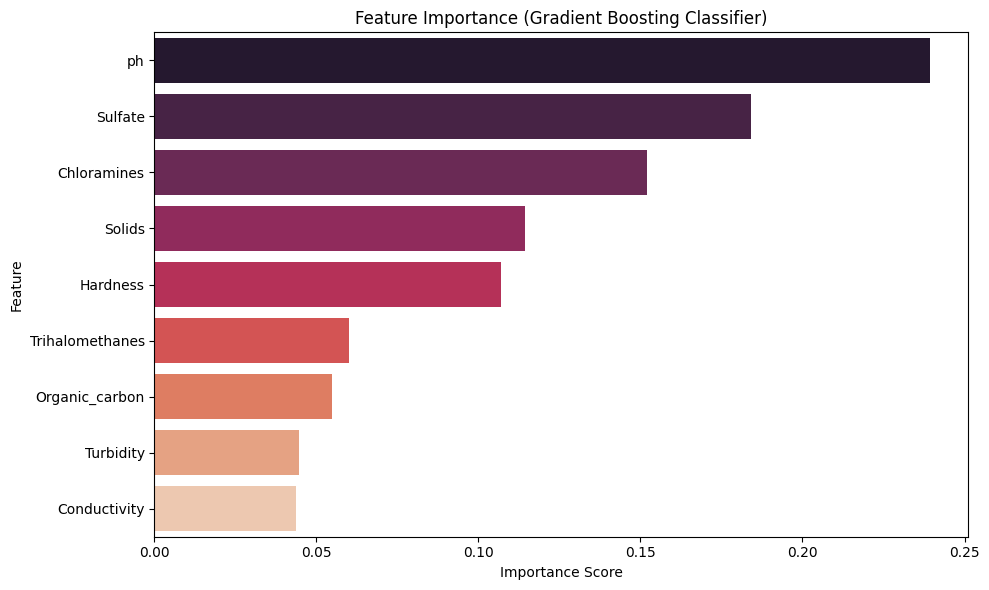

In [67]:
# Get trained Gradient Boosting classifier from pipeline
gb_classifier = gb_pipeline.named_steps['classifier']

# Get feature importances
importance = gb_classifier.feature_importances_

# Create DataFrame
feature_names = trainX_full.columns
feat_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

# Print result
print("\nFeature Importance from Gradient Boosting Classifier:")
print(feat_importance_df)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_importance_df, palette='rocket')
plt.title('Feature Importance (Gradient Boosting Classifier)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


## Table Summary of Metrics

### IMPUTATION ONLY, NO SCALING OR SMOTING 

In [68]:
impute_only_accuracy_df = pd.DataFrame(impute_only_accuracy_summary)
impute_only_accuracy_df

,Model,Test Accuracy
0,Random Forest Classifier,0.673780
1,Decision Tree Classifier,0.579268
2,KNN,0.586890
3,Logistic Regression,0.628049
4,Naive Bayes,0.628049
5,Gradient Boosting,0.658537


In [69]:
impute_only_precision_df = pd.DataFrame(impute_only_precision_summary)
impute_only_precision_df

,Model,Precision
0,Random Forest Classifier,0.691120
1,Decision Tree Classifier,0.678010
2,KNN,0.625222
3,Logistic Regression,0.628049
4,Naive Bayes,0.652174
5,Gradient Boosting,0.670290


In [70]:
impute_only_recall_df = pd.DataFrame(impute_only_recall_summary)
impute_only_recall_df

,Model,Recall
0,Random Forest Classifier,0.868932
1,Decision Tree Classifier,0.628641
2,KNN,0.854369
3,Logistic Regression,1.000000
4,Naive Bayes,0.873786
5,Gradient Boosting,0.898058


In [71]:
impute_only_f1_df = pd.DataFrame(impute_only_f1_summary)
impute_only_f1_df

,Model,F1 Score
0,Random Forest Classifier,0.769892
1,Decision Tree Classifier,0.652393
2,KNN,0.722051
3,Logistic Regression,0.771536
4,Naive Bayes,0.746888
5,Gradient Boosting,0.767635


In [72]:
impute_only_specificity_df = pd.DataFrame(impute_only_specificity_summary)
impute_only_specificity_df

,Model,Specificity
0,Random Forest Classifier,0.344262
1,Decision Tree Classifier,0.495902
2,KNN,0.135246
3,Logistic Regression,0.000000
4,Naive Bayes,0.213115
5,Gradient Boosting,0.254098


### WITH IMPUTATION, SCALING, AND SMOTING

In [73]:
accuracy_df = pd.DataFrame(accuracy_summary)
accuracy_df

,Model,Test Accuracy
0,Random Forest Classifier,0.641768
1,Decision Tree Classifier,0.583841
2,KNN,0.638720
3,Logistic Regression,0.496951
4,SVM,0.513720
5,Naive Bayes,0.586890
6,Gradient Boosting,0.608232


In [74]:
precision_df = pd.DataFrame(precision_summary)
precision_df

,Model,Precision
0,Random Forest Classifier,0.706294
1,Decision Tree Classifier,0.686327
2,KNN,0.676056
3,Logistic Regression,0.620588
4,SVM,0.627397
5,Naive Bayes,0.673219
6,Gradient Boosting,0.696203


In [75]:
recall_df = pd.DataFrame(recall_summary)
recall_df

,Model,Recall
0,Random Forest Classifier,0.735437
1,Decision Tree Classifier,0.621359
2,KNN,0.815534
3,Logistic Regression,0.512136
4,SVM,0.555825
5,Naive Bayes,0.665049
6,Gradient Boosting,0.667476


In [76]:
f1_df = pd.DataFrame(f1_summary)
f1_df

,Model,F1 Score
0,Random Forest Classifier,0.720571
1,Decision Tree Classifier,0.652229
2,KNN,0.739274
3,Logistic Regression,0.561170
4,SVM,0.589447
5,Naive Bayes,0.669109
6,Gradient Boosting,0.681537


In [77]:
specificity_df = pd.DataFrame(specificity_summary)
specificity_df

,Model,Specificity
0,Random Forest Classifier,0.483607
1,Decision Tree Classifier,0.520492
2,KNN,0.340164
3,Logistic Regression,0.471311
4,SVM,0.442623
5,Naive Bayes,0.454918
6,Gradient Boosting,0.508197


## VISUALIZATION

### IMPUTE ONLY, NO SCALING AND SMOTING

In [78]:
# GET Y VALUES FROM DATAFRAMES
impute_only_accuracies = impute_only_accuracy_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Test Accuracy'].values

impute_only_precisions = impute_only_precision_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Precision'].values

impute_only_recalls = impute_only_recall_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Recall'].values

impute_only_f1_scores = impute_only_f1_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['F1 Score'].values

impute_only_specificities = impute_only_specificity_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Specificity'].values


In [79]:
# CONSOLIDATE METRICS INTO ONE TABLE
impute_only_data = {
    'Model': [
        'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
        'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
    ],
    'Accuracy': impute_only_accuracies,
    'Precision': impute_only_precisions,
    'Recall': impute_only_recalls,
    'F1 Score': impute_only_f1_scores,
    'Specificity': impute_only_specificities
}

impute_only_consolidated_df = pd.DataFrame(impute_only_data)

impute_only_consolidated_df


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Random Forest Classifier,0.673780,0.691120,0.868932,0.769892,0.344262
1,Decision Tree Classifier,0.579268,0.678010,0.628641,0.652393,0.495902
2,KNN,0.586890,0.625222,0.854369,0.722051,0.135246
3,Logistic Regression,0.628049,0.628049,1.000000,0.771536,0.000000
4,SVM,NaN,NaN,NaN,NaN,NaN
5,Naive Bayes,0.628049,0.652174,0.873786,0.746888,0.213115
6,Gradient Boosting,0.658537,0.670290,0.898058,0.767635,0.254098


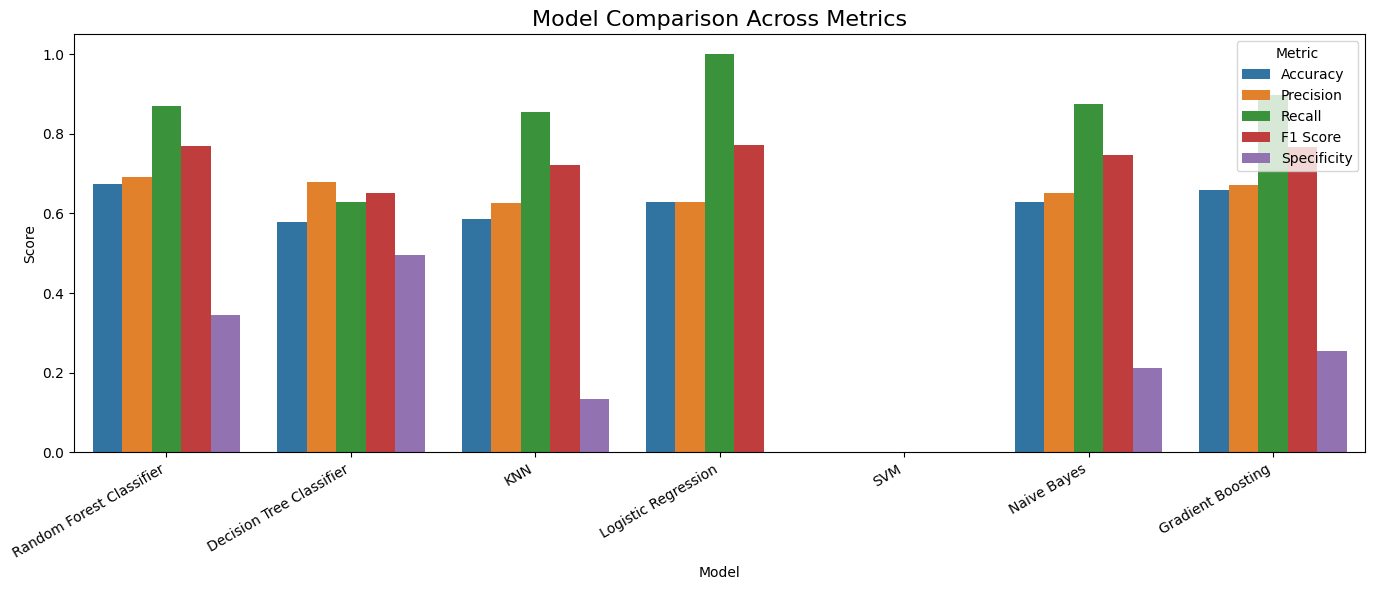

In [80]:
# VISUALIZE CONSOLIDATED DATA

impute_only_consolidated_df_melted = impute_only_consolidated_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=impute_only_consolidated_df_melted)

plt.title('Model Comparison Across Metrics', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

### WITH IMPUTATION, SCALING, AND SMOTING 

In [81]:
# GET Y VALUES FROM DATAFRAMES
accuracies = accuracy_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Test Accuracy'].values

precisions = precision_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Precision'].values

recalls = recall_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Recall'].values

f1_scores = f1_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['F1 Score'].values

specificities = specificity_df.set_index('Model').reindex([
    'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
    'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
])['Specificity'].values


In [82]:
# CONSOLIDATE METRICS INTO ONE TABLE
data = {
    'Model': [
        'Random Forest Classifier', 'Decision Tree Classifier', 'KNN',
        'Logistic Regression', 'SVM', 'Naive Bayes', 'Gradient Boosting'
    ],
    'Accuracy': accuracies,
    'Precision': precisions,
    'Recall': recalls,
    'F1 Score': f1_scores,
    'Specificity': specificities
}

consolidated_df = pd.DataFrame(data)

consolidated_df


,Model,Accuracy,Precision,Recall,F1 Score,Specificity
0,Random Forest Classifier,0.641768,0.706294,0.735437,0.720571,0.483607
1,Decision Tree Classifier,0.583841,0.686327,0.621359,0.652229,0.520492
2,KNN,0.638720,0.676056,0.815534,0.739274,0.340164
3,Logistic Regression,0.496951,0.620588,0.512136,0.561170,0.471311
4,SVM,0.513720,0.627397,0.555825,0.589447,0.442623
5,Naive Bayes,0.586890,0.673219,0.665049,0.669109,0.454918
6,Gradient Boosting,0.608232,0.696203,0.667476,0.681537,0.508197


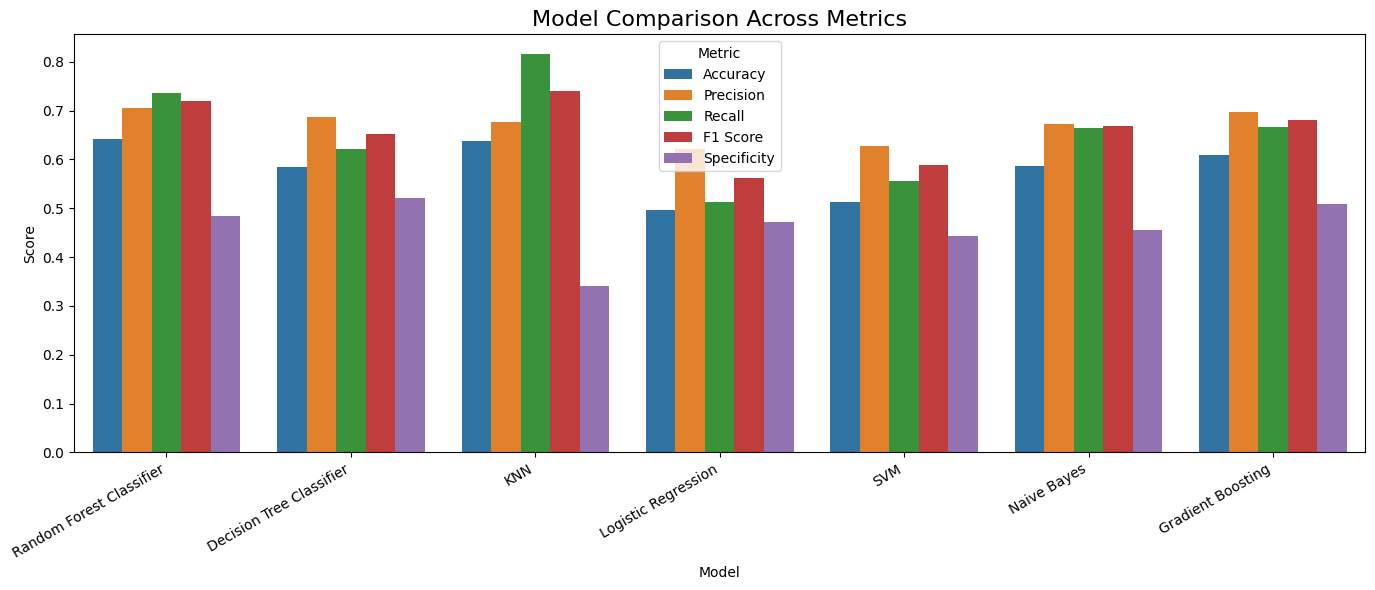

In [83]:
# VISUALIZE CONSOLIDATED DATA

consolidated_df_melted = consolidated_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

plt.figure(figsize=(14,6))
sns.barplot(x="Model", y="Score", hue="Metric", data=consolidated_df_melted)

plt.title('Model Comparison Across Metrics', fontsize=16)
plt.ylabel('Score')
plt.xticks(rotation=30, ha='right')
plt.legend(title='Metric')
plt.tight_layout()
plt.show()

# Observations and Insights

- **Best Recall and F1 Score:** KNN is the best at identifying positive class *(Recall = 0.816)* and has the highest *F1 Score at 0.739*
- **Best Precision:** Random Forest leads with *0.706*, followed closely by Gradient Boosting at 0.696.
- **Best Specificity:** Gradient Boosting *(0.508)* slightly outperforms others.
- **Best Overall Balanced Performance:**  Random Forest and Gradient Boosting show strong, balanced performance across precision, recall, and F1.

In [84]:
### DUMP MODEL PIPELINES FOR FUTURE USE

# model_pipelines = {
#     "potability_rdf_pipeline": rfd_pipeline,
#     "potability_dt_pipeline": dt_pipeline,
#     "potability_knn_pipeline": knn_pipeline,
#     "potability_logRes_pipeline": logRes_pipeline,
#     "potability_nb_pipeline": nb_pipeline,
#     "potability_svm_pipeline":svm_pipeline,
#     "potability_gb_pipeline": gb_pipeline
# }

# for pipeline_name, pipeline in model_pipelines.items():
#     joblib.dump(pipeline, f'{pipeline_name}.pkl')
#     print(f"Pipeline saved as '{pipeline_name}.pkl' ")